In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

<h1>Data Analysis</h1>

In [2]:
df = pd.read_csv('uci-electricity-usage/uci-electricity-usage.csv')
df.head(3)

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,11/1/16 17:00,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,...,17.033333,45.53,6.60,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,11/1/16 17:10,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,...,17.066667,45.56,6.48,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,11/1/16 17:20,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,...,17.000000,45.50,6.37,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


In [3]:
df.tail(3)

,date,target_appliances,target_lights,target_total,T1,RH_1,T2,RH_2,T3,RH_3,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19732,27/5/16 17:40,270,10,280,25.5,46.596667,25.628571,42.768571,27.050000,41.690000,...,23.2,46.7900,22.5,755.2,56.333333,3.666667,25.333333,13.3,29.199117,29.199117
19733,27/5/16 17:50,420,10,430,25.5,46.990000,25.414000,43.036000,26.890000,41.290000,...,23.2,46.8175,22.3,755.2,56.666667,3.833333,26.166667,13.2,6.322784,6.322784
19734,27/5/16 18:00,430,10,440,25.5,46.600000,25.264286,42.971429,26.823333,41.156667,...,23.2,46.8450,22.2,755.2,57.000000,4.000000,27.000000,13.2,34.118851,34.118851


In [4]:
df.shape

(19735, 30)

In [5]:
# There's no missing value
df.isna().sum()

date                 0
target_appliances    0
target_lights        0
target_total         0
T1                   0
RH_1                 0
T2                   0
RH_2                 0
T3                   0
RH_3                 0
T4                   0
RH_4                 0
T5                   0
RH_5                 0
T6                   0
RH_6                 0
T7                   0
RH_7                 0
T8                   0
RH_8                 0
T9                   0
RH_9                 0
T_out                0
Press_mm_hg          0
RH_out               0
Windspeed            0
Visibility           0
Tdewpoint            0
rv1                  0
rv2                  0
dtype: int64

In [6]:
# Rename columns for readability
nameChangedTo=['date', 'target_appliances', 'target_lights', 'target_total', 'T_kitchen', 
               'RH_kitchen', 'T_living', 'RH_living', 'T_laundry', 'RH_laundry', 'T_office', 
               'RH_office', 'T_bathroom', 'RH_bathroom', 'T_north', 'RH_north', 'T_ironing', 
               'RH_ironing', 'T_teenRoom', 'RH_teenRoom', 'T_parentsRoom', 'RH_parentsRoom', 
               'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 
               'random1', 'random2']

df.columns = nameChangedTo

In [7]:
#Except Date column, the rest of the data are all numerical values
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 30 columns):
date                 19735 non-null object
target_appliances    19735 non-null int64
target_lights        19735 non-null int64
target_total         19735 non-null int64
T_kitchen            19735 non-null float64
RH_kitchen           19735 non-null float64
T_living             19735 non-null float64
RH_living            19735 non-null float64
T_laundry            19735 non-null float64
RH_laundry           19735 non-null float64
T_office             19735 non-null float64
RH_office            19735 non-null float64
T_bathroom           19735 non-null float64
RH_bathroom          19735 non-null float64
T_north              19735 non-null float64
RH_north             19735 non-null float64
T_ironing            19735 non-null float64
RH_ironing           19735 non-null float64
T_teenRoom           19735 non-null float64
RH_teenRoom          19735 non-null float64
T_parentsRoom     

,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,...,T_parentsRoom,RH_parentsRoom,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,random1,random2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,101.496833,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,...,19.485828,41.552401,7.412580,755.522602,79.750418,4.039752,38.330834,3.760995,24.988033,24.988033
std,102.524891,7.935988,104.380829,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,...,2.014712,4.151497,5.318464,7.399441,14.901088,2.451221,11.794719,4.195248,14.496634,14.496634
min,10.000000,0.000000,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,50.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,...,18.000000,38.500000,3.670000,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,60.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,...,19.390000,40.900000,6.920000,756.100000,83.666667,3.666667,40.000000,3.430000,24.897653,24.897653
75%,100.000000,0.000000,100.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,...,20.600000,44.338095,10.400000,760.933333,91.666667,5.500000,40.000000,6.570000,37.583769,37.583769
max,1080.000000,70.000000,1110.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


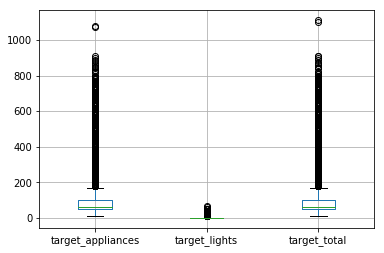

In [8]:
df.boxplot(['target_appliances', 'target_lights','target_total'])

The data was collected in 10 min interval from Jan to May.

From above analysis, the target_appliances has maximum of 1080. Which is way above the normal range.
Also most of the data are 0 for target_lights.
In order to visisualize outliers, draw boxplots. 

From the boxplot, there were many outliers. It can possibly becuase the data is collected every 10 minutes including when residents are away or sleeping. Hence most of the collected points are low comparing to few heavy usages when residents are at home and using appliances and lights

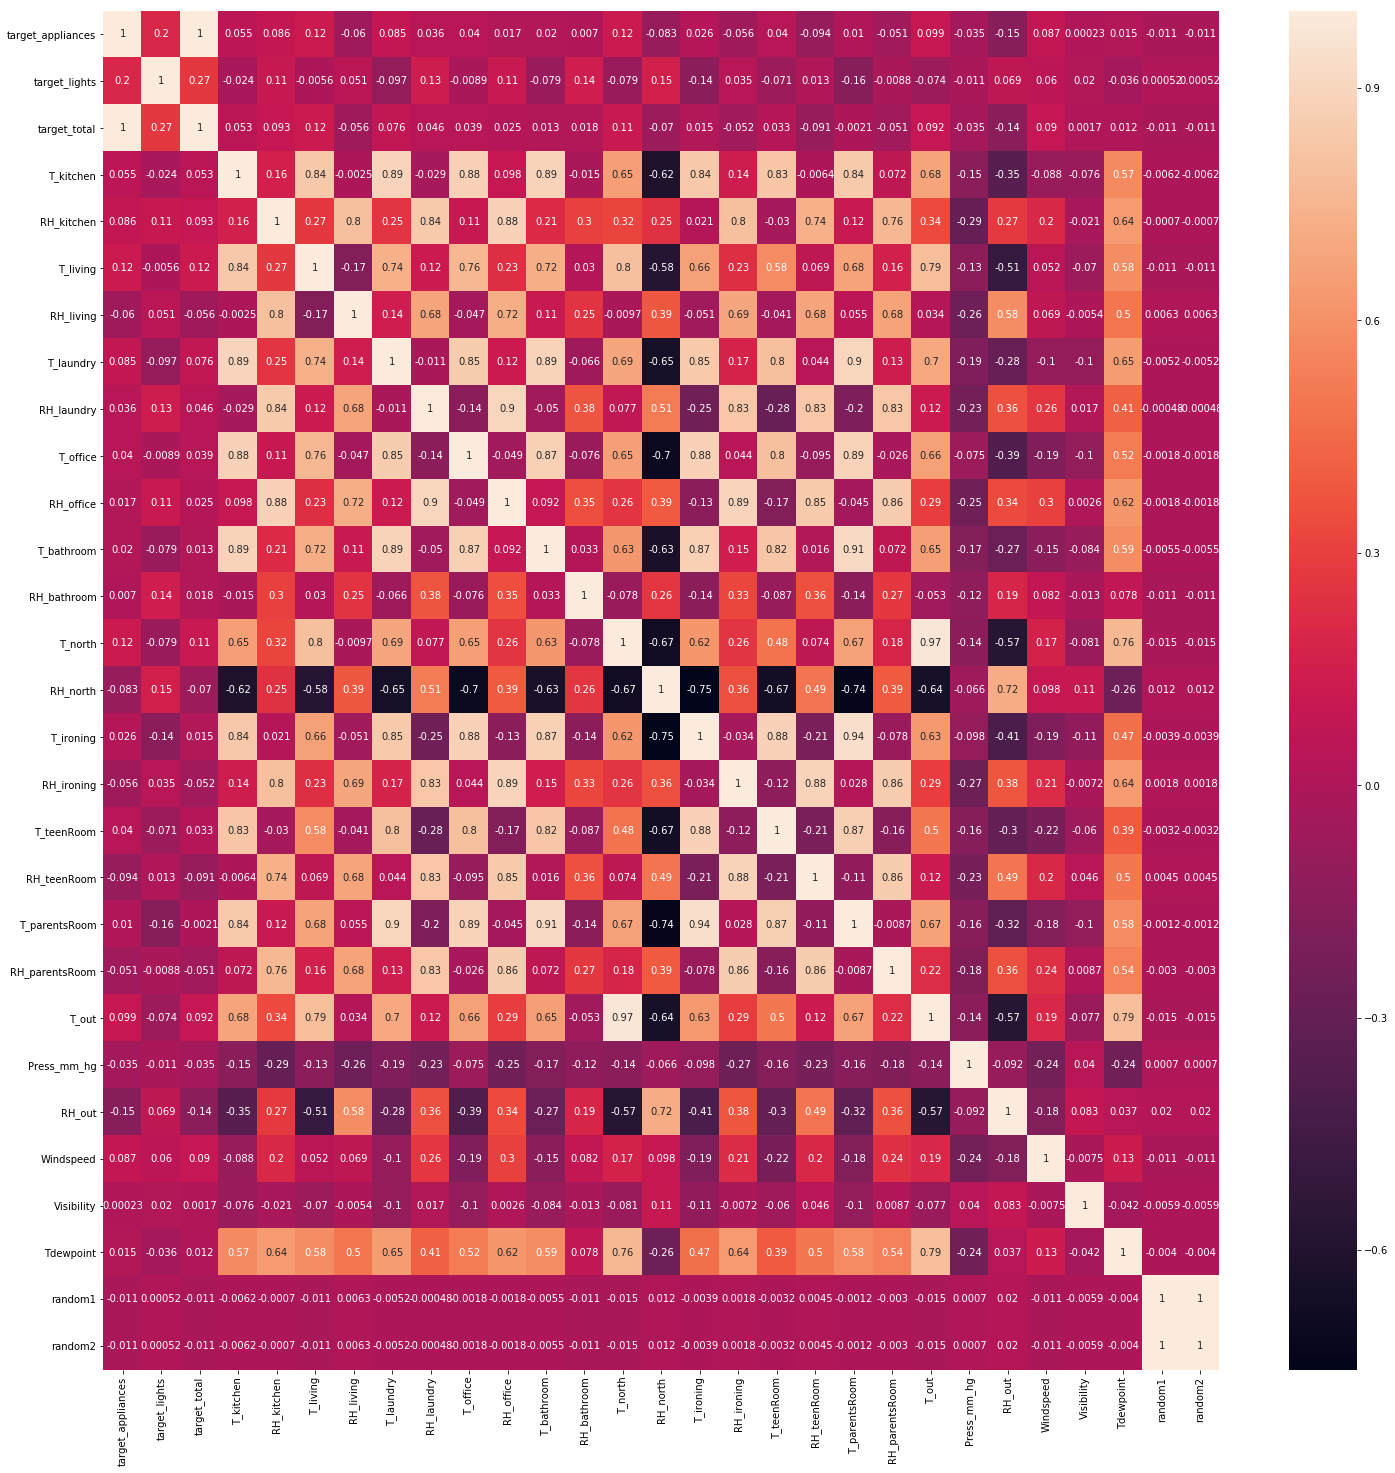

In [9]:
# To find out how each features correlate to each other
plt.figure(figsize=[25,25])
corr = df.corr()
sb.heatmap(corr, annot=True);

The temperature is negatively correlated with humidity. 
The increase in outside humidity causes the room temperature to drop. 
Outside temperature has positive correlationship with room temperature which is expected. 
The target total also has correlationship with outside humidity.

rv1 and rv2 seems irrelvant since they don't seem to have strong relation with any feature. We'll perform feature ranking later to see which features are most important.

<h1>Data Preprocessing</h1>

<h3>Handling non-numerical and categorical values</h3>

In [10]:
# First of all, convert Date column into datetime64 object
df['date'] = pd.to_datetime(df['date'], format='%d/%m/%y %H:%M')
df.dtypes

date                 datetime64[ns]
target_appliances             int64
target_lights                 int64
target_total                  int64
T_kitchen                   float64
RH_kitchen                  float64
T_living                    float64
RH_living                   float64
T_laundry                   float64
RH_laundry                  float64
T_office                    float64
RH_office                   float64
T_bathroom                  float64
RH_bathroom                 float64
T_north                     float64
RH_north                    float64
T_ironing                   float64
RH_ironing                  float64
T_teenRoom                  float64
RH_teenRoom                 float64
T_parentsRoom               float64
RH_parentsRoom              float64
T_out                       float64
Press_mm_hg                 float64
RH_out                      float64
Windspeed                   float64
Visibility                  float64
Tdewpoint                   

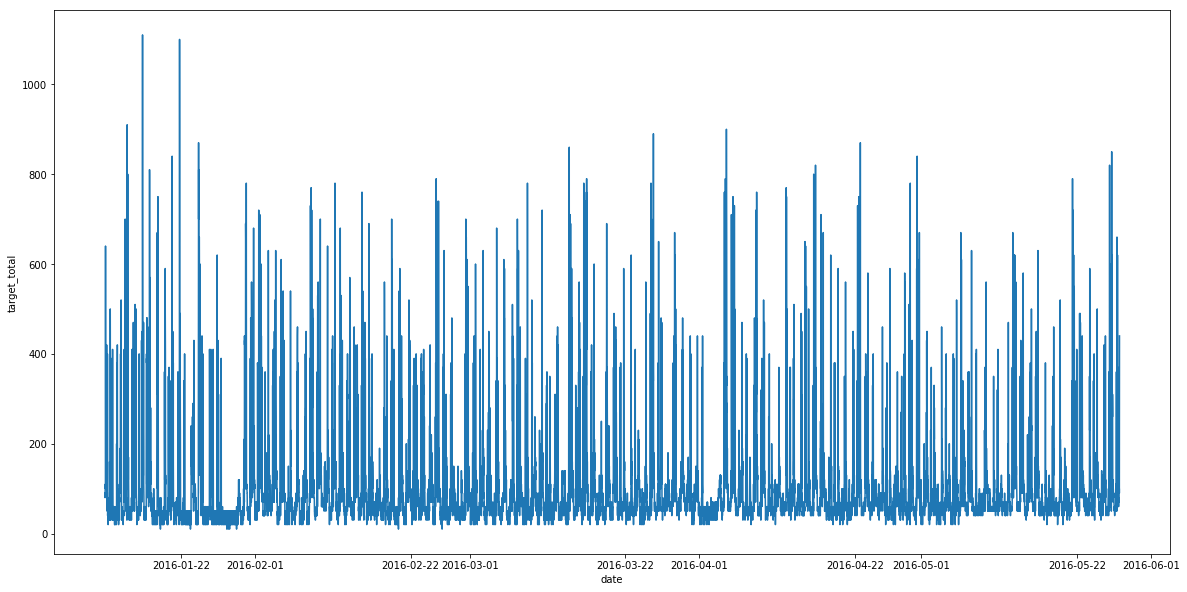

In [11]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# The trend for date against the target_total is plotted.
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.plot(df['date'], df['target_total'])
plt.xlabel("date")
plt.ylabel("target_total")
plt.show()

The target_total is flatuating along the time line instead of having a stable line. 
It may be because of time in a day or day of the week.

The target_total is flat some of the days probably because noboday is home during these days. The following trends take a closer look at such week.

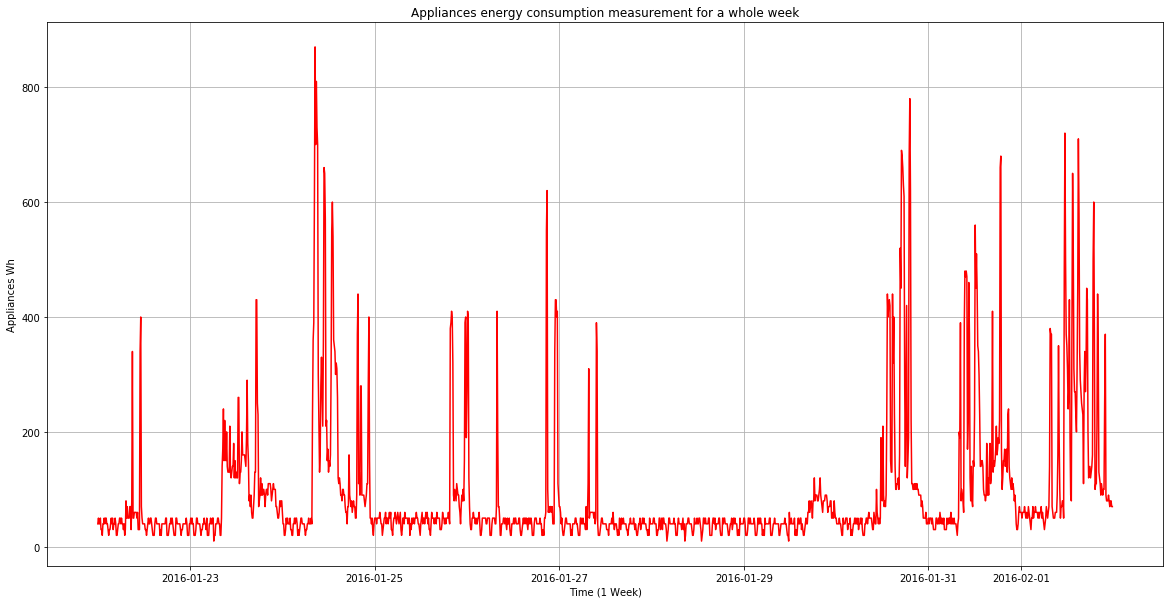

In [12]:
df_flat = df.copy()
df_flat['date'] = pd.to_datetime(df_flat['date'], format='%d/%m/%y %H:%M')
df_flat = df_flat.set_index('date')
df_flat = df_flat['2016-01-22':'2016-02-01']

plt.plot(df_flat['target_total'], color="red")
plt.rcParams["figure.figsize"] = (18,10)
plt.title('Appliances energy consumption measurement for a whole week')
plt.grid()
plt.xlabel('Time (1 Week)')
plt.ylabel('Appliances Wh')
plt.show()

In [13]:
datatime_df = df[["date","target_appliances", "target_lights", "target_total"]]
datatime_df = datatime_df.set_index('date')
datatime_df.head(2)

,target_appliances,target_lights,target_total
date,,,
2016-01-11 17:00:00,60,30,90
2016-01-11 17:10:00,60,30,90


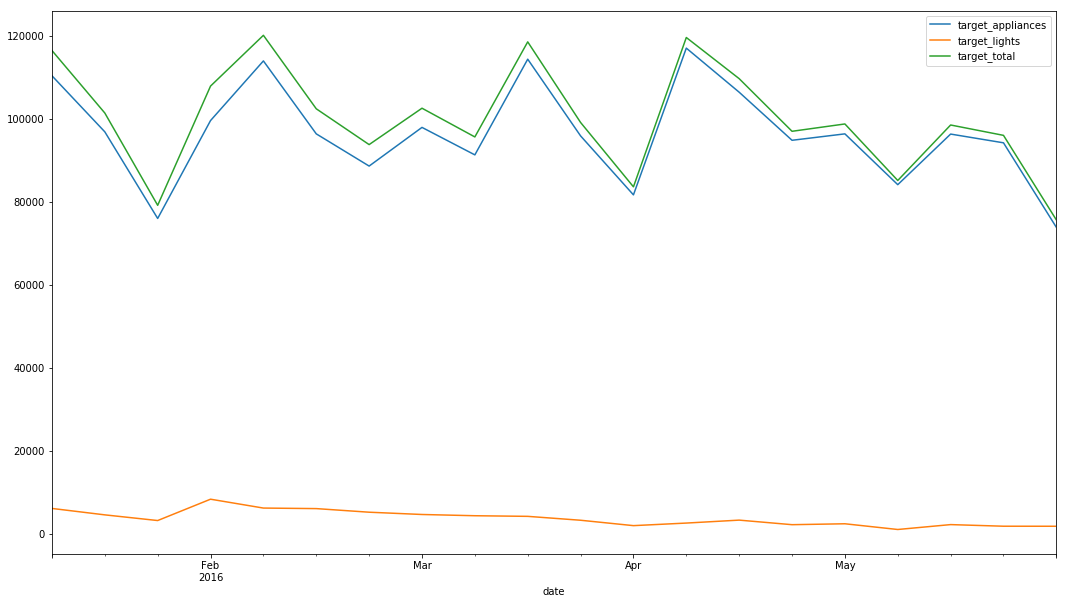

In [14]:
weekly = datatime_df.resample('W').sum()
weekly.plot();

It can be seen that the trend for target_light is stable across the months. 
The target total is contributed mainly from appliances. <br>
To get the better idea, pull out the trend in week.

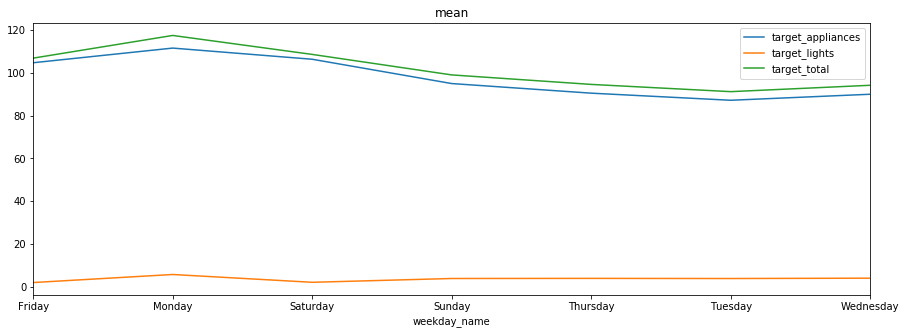

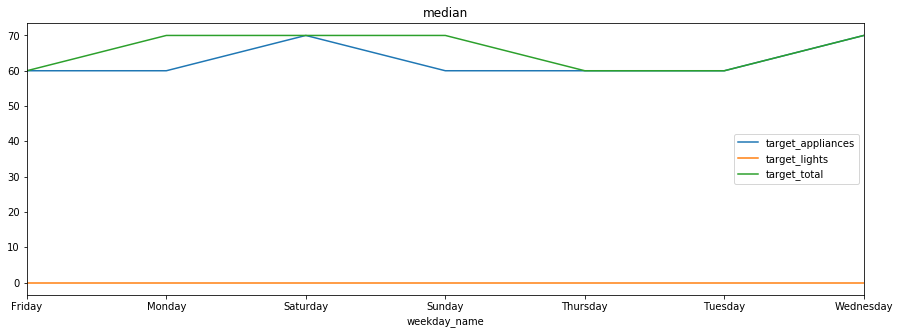

In [15]:
week_day = datatime_df.copy()
week_day ['weekday_name'] = week_day.index.weekday_name

week_day_mean = week_day.groupby(['weekday_name']).mean()
week_day_mean.plot(title='mean', figsize=[15,5]);

week_day_median = week_day.groupby(['weekday_name']).median()
week_day_median.plot(title='median', figsize=[15,5]);

From above graphs, the appliances usage is normally higher on Saturday and Wednesdy. <br>
The average is slightly higher on Mondays, which means more usage spikes on Mondays. The electricity usage is still stable.<br>
However, there's no clear trend
We pull out the trend for each hour to see hourly usuage.

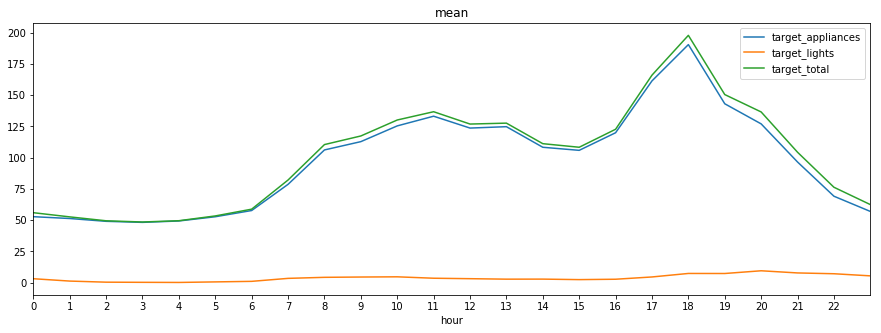

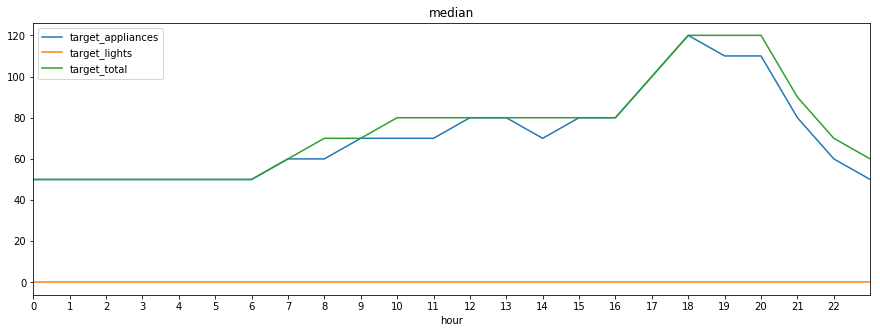

In [16]:
hour = datatime_df.copy()
hour['hour'] = week_day.index.hour

hour_mean = hour.groupby(['hour']).mean()
hour_mean.plot(title='mean', figsize=[15,5], xticks=np.arange(0,23));

hour_median = hour.groupby(['hour']).median()
hour_median.plot(title='median', figsize=[15,5], xticks=np.arange(0,23));

The usuage is stable at night, but spikes up in the evening ard 6pm.

In [17]:
# Replace date column with columns of individual date componenets
# Year was ignored since all data are collected on same year

df['day'] = datatime_df.index.day
df['month'] = datatime_df.index.month
df['hour'] = week_day.index.hour
df['min'] = datatime_df.index.minute
df['weekday_'] = datatime_df.index.weekday_name
df.drop('date', axis=1, inplace=True)

Now all the columns are transformed into numerical values. 
weekday name is categorical value that needs encoding.

In [18]:
encoded_weekdays = pd.get_dummies(df['weekday_'], dtype='int64')
df = df.join(encoded_weekdays)
df.drop('weekday_', axis=1, inplace=True)
df.head(3)

,target_appliances,target_lights,target_total,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,...,month,hour,min,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,60,30,90,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,1,17,0,0,1,0,0,0,0,0
1,60,30,90,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,1,17,10,0,1,0,0,0,0,0
2,50,30,80,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,1,17,20,0,1,0,0,0,0,0


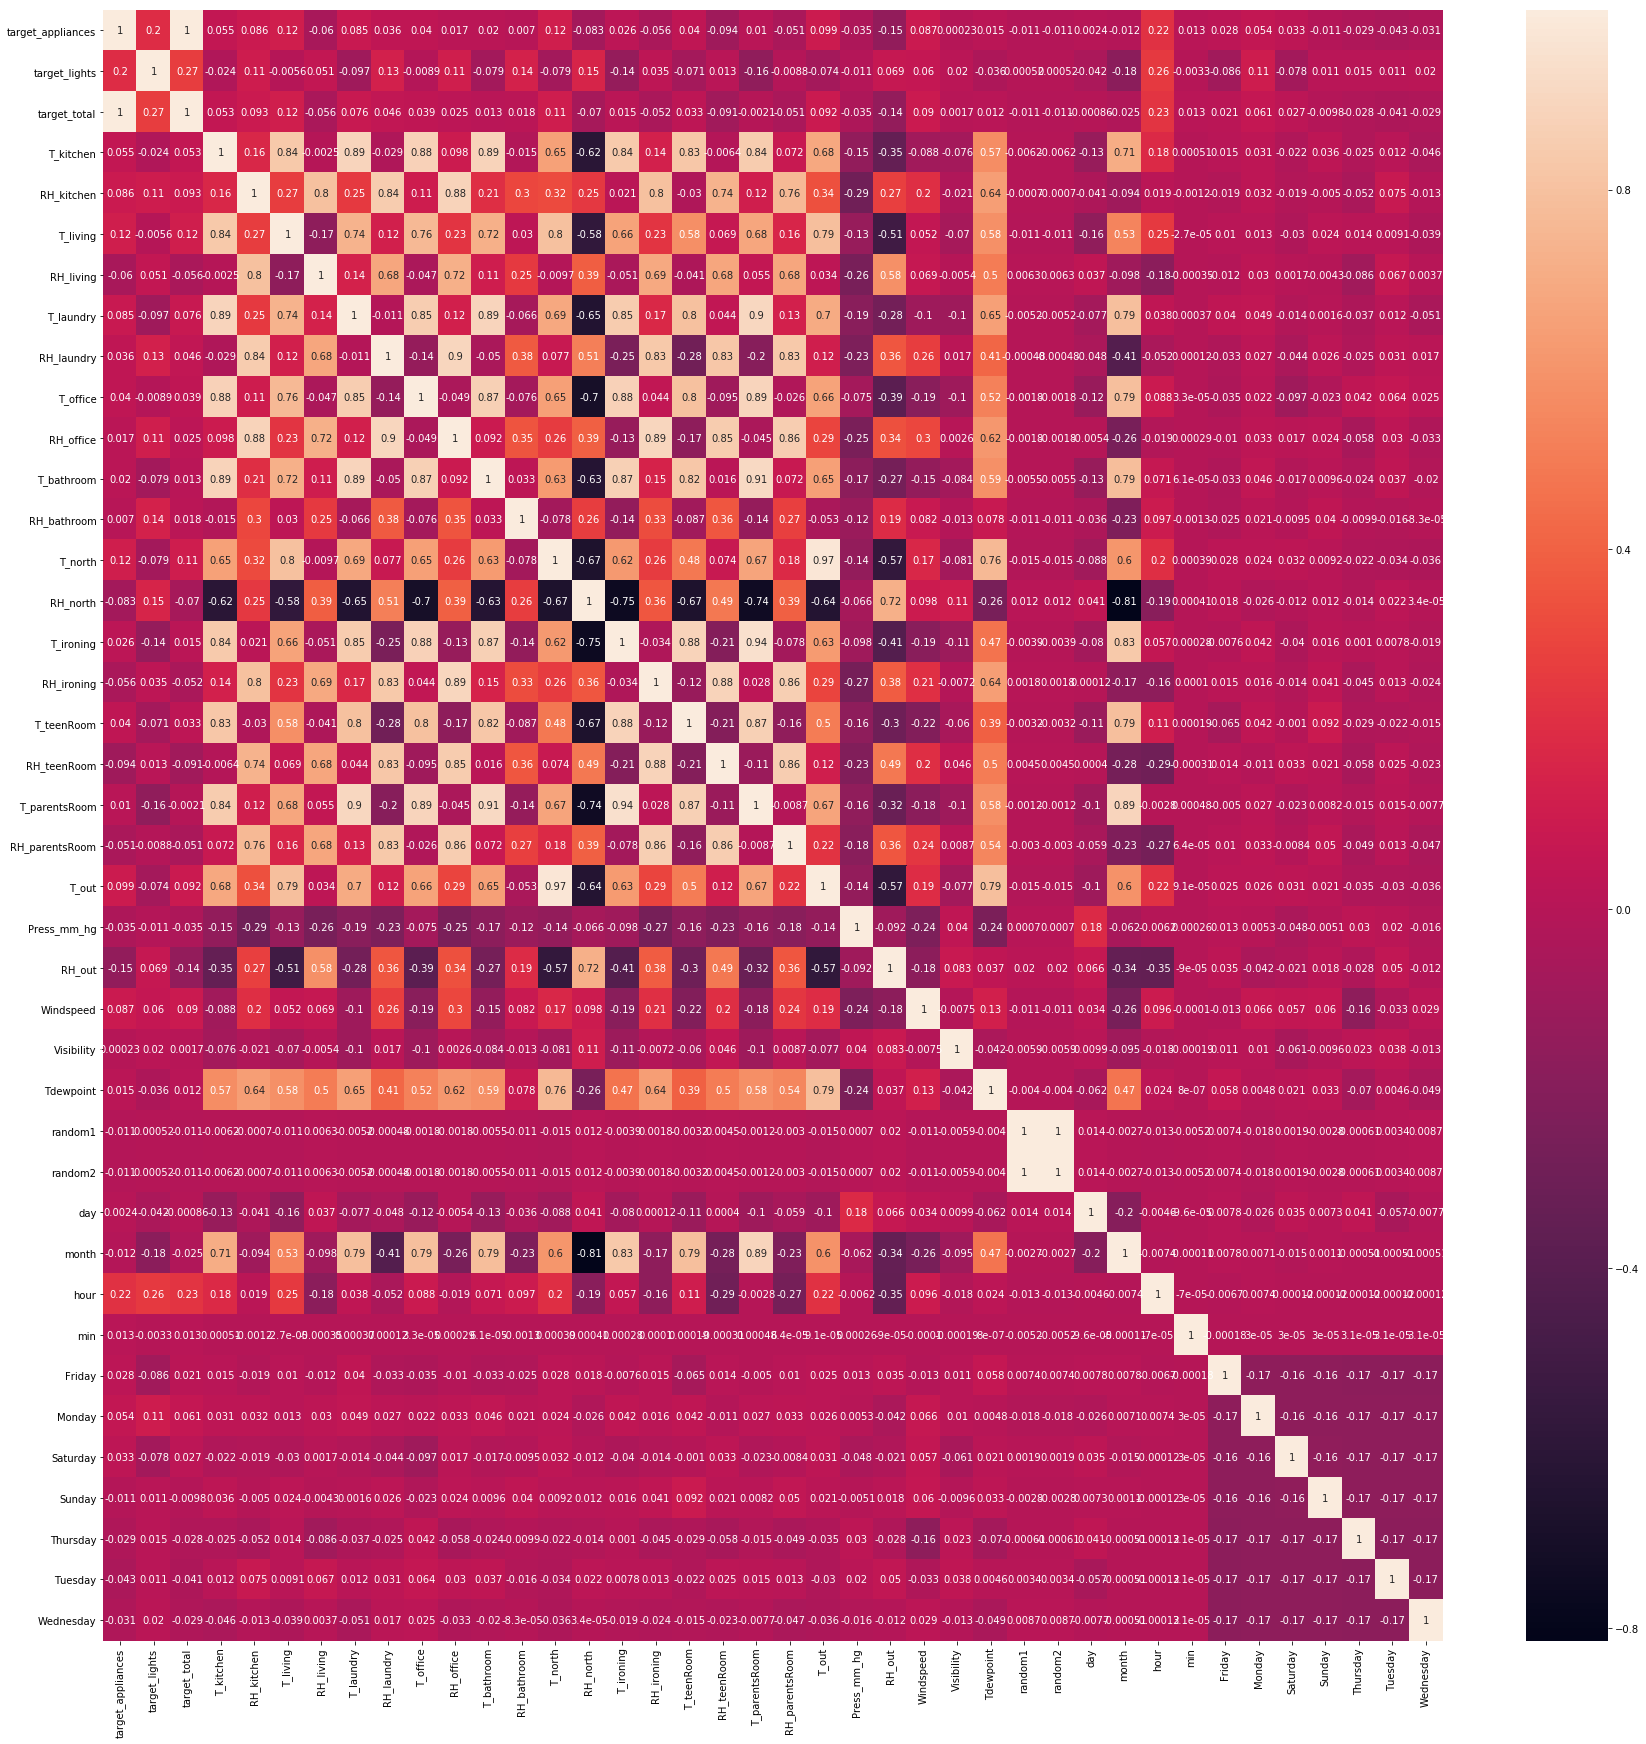

In [19]:
# To find out how each features correlate to each other
plt.figure(figsize=[30,30])
corr = df.corr()
sb.heatmap(corr, annot=True);

<h3>Feature Scaling</h3>

In [20]:
X = df.drop(['target_appliances', 'target_lights', 'target_total'], axis=1)
Y = df[['target_appliances', 'target_lights', 'target_total']]
y_total = Y[['target_total']]

In [21]:
# Normalization

X_normalized = pd.DataFrame(preprocessing.normalize(X), columns=X.columns)
X_normalized.head(3)

,T_kitchen,RH_kitchen,T_living,RH_living,T_laundry,RH_laundry,T_office,RH_office,T_bathroom,RH_bathroom,...,month,hour,min,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0.026144,0.062562,0.025237,0.058873,0.026012,0.058794,0.024974,0.059893,0.022564,0.072556,...,0.001314,0.022345,0.000000,0.0,0.001314,0.0,0.0,0.0,0.0,0.0
1,0.026143,0.061373,0.025236,0.058783,0.026012,0.058871,0.024973,0.060452,0.022564,0.072554,...,0.001314,0.022345,0.013144,0.0,0.001314,0.0,0.0,0.0,0.0,0.0
2,0.026127,0.060819,0.025221,0.058621,0.025996,0.059024,0.024862,0.060280,0.022550,0.072365,...,0.001314,0.022331,0.026272,0.0,0.001314,0.0,0.0,0.0,0.0,0.0


<h3>Re-categorizing the target features</h3>

In [22]:
print( y_total.nunique())
print('Since original dataset has 91 unique values for target_total,\
 it was split into 5 different categories: ')

def generateClass(x):
    if x<30:
        return 5
    elif (x<=50 and x>=30):
        return 4
    elif (x<=70 and x>50):
        return 3
    elif (x<=90 and x>70):
        return 2
    
    else :
        return 1
    
y_total_new_cat = y_total["target_total"].apply(generateClass)
print(y_total_new_cat.unique())

target_total    91
dtype: int64
Since original dataset has 91 unique values for target_total, it was split into 5 different categories: 
[2 1 3 4 5]


<h3>Principle Component Analysis</h3>

In [23]:
from sklearn.decomposition import PCA

In [24]:
X_normalized.columns

Index(['T_kitchen', 'RH_kitchen', 'T_living', 'RH_living', 'T_laundry',
       'RH_laundry', 'T_office', 'RH_office', 'T_bathroom', 'RH_bathroom',
       'T_north', 'RH_north', 'T_ironing', 'RH_ironing', 'T_teenRoom',
       'RH_teenRoom', 'T_parentsRoom', 'RH_parentsRoom', 'T_out',
       'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint',
       'random1', 'random2', 'day', 'month', 'hour', 'min', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [25]:
pca = PCA(n_components = 15)
pca = pca.fit_transform(X_normalized)
X_pca = pd.DataFrame(pca)
X_pca.columns = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 'PCA11', 'PCA12', 'PCA13', 'PCA14', 'PCA15']

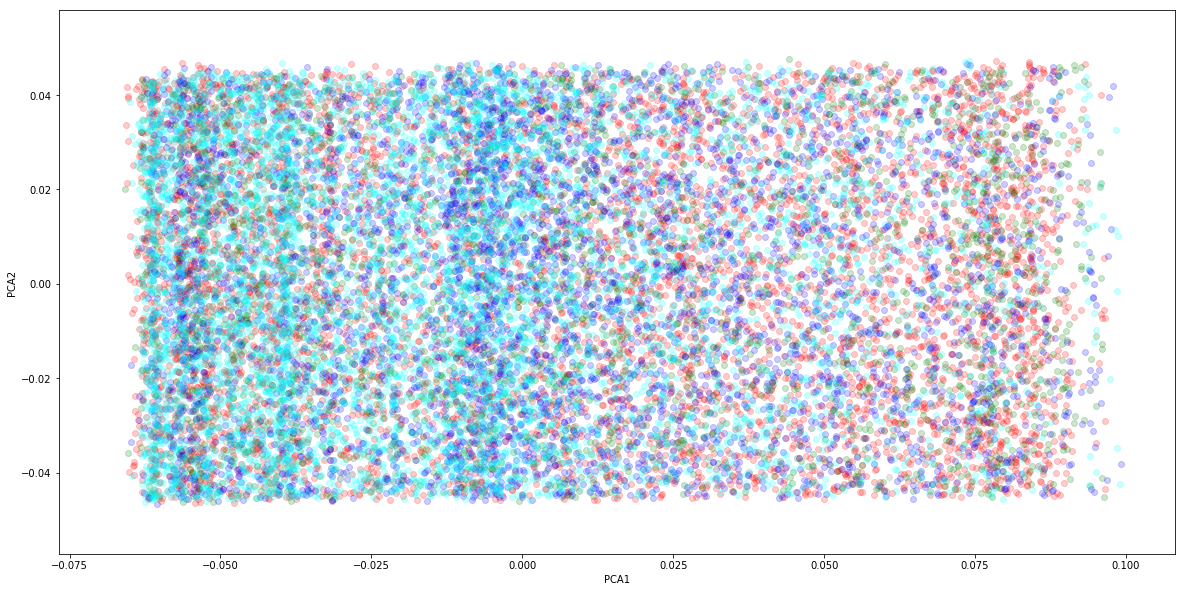

In [26]:
# X_pca = pd.concat([X_normalized, pca_df], axis=1)
# X_pca.head(3)

pca_df = pd.concat([X_pca, y_total_new_cat], axis=1)

df_plt = pca_df.copy()
df_plt.drop('target_total', axis=1, inplace=True)
df_plt = df_plt.join(y_total_new_cat)
df_cat1 = df_plt[df_plt['target_total']==1]
df_cat2 = df_plt[df_plt['target_total']==2]
df_cat3 = df_plt[df_plt['target_total']==3]
df_cat4 = df_plt[df_plt['target_total']==4]
df_cat5 = df_plt[df_plt['target_total']==5]

plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.scatter(df_cat1['PCA1'], df_cat1['PCA2'], c='red', alpha=0.2)
plt.scatter(df_cat2['PCA1'], df_cat2['PCA2'], c='green', alpha=0.2)
plt.scatter(df_cat3['PCA1'], df_cat3['PCA2'], c='blue', alpha=0.2)
plt.scatter(df_cat4['PCA1'], df_cat4['PCA2'], c='cyan', alpha=0.2)
plt.scatter(df_cat5['PCA1'], df_cat5['PCA2'], c='gray', alpha=0.2)

plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

<h1>Training Models</h1>

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

def k_fold_validation_on_model(model, df_X, df_y):
    k_fold = KFold(n_splits=10, shuffle=True)
    X = np.array(df_X)
    y = np.array(df_y)
    accuracies = []

    for train, test in k_fold.split(X):
        X_train, X_test = X[train], X[test]
        y_train, y_test = y[train], y[test]
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        accuracies.append(accuracy_score(y_test, predictions) * 100)
    
    return accuracies

<h3>Decision Tree Classifier</h3>

<h5>Feature Selection</h5>

In [28]:
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier

In [29]:
sfm = SelectFromModel(DecisionTreeClassifier())
feature_selected_dt = sfm.fit_transform(X_pca, y_total_new_cat)

In [30]:
dt = DecisionTreeClassifier(criterion="entropy")
dt_accuracies = k_fold_validation_on_model(dt, feature_selected_dt, y_total_new_cat)

print("Average Accuracy(Decision Tree): ", np.mean(dt_accuracies).round(2))

Average Accuracy(Decision Tree):  57.73


Since the depth is not limiting, they are overfitting. Hence, performs preprunning.

In [31]:
dt_prunned = DecisionTreeClassifier(criterion="entropy", max_depth=3)
dt_prunned_accuracies = k_fold_validation_on_model(dt_prunned, feature_selected_dt, y_total_new_cat)

print("Average Accuracy(Decision Tree): ", np.mean(dt_prunned_accuracies).round(2))


Average Accuracy(Decision Tree):  47.72


In [48]:
dt_prunned_accuracies = []

for depth in range(1,18):
    dt_prunned = DecisionTreeClassifier(criterion="entropy", max_depth=depth)
    accuracies = k_fold_validation_on_model(dt_prunned, X_pca, y_total_new_cat)
    dt_prunned_accuracies.append( np.mean(accuracies).round(2) )
    

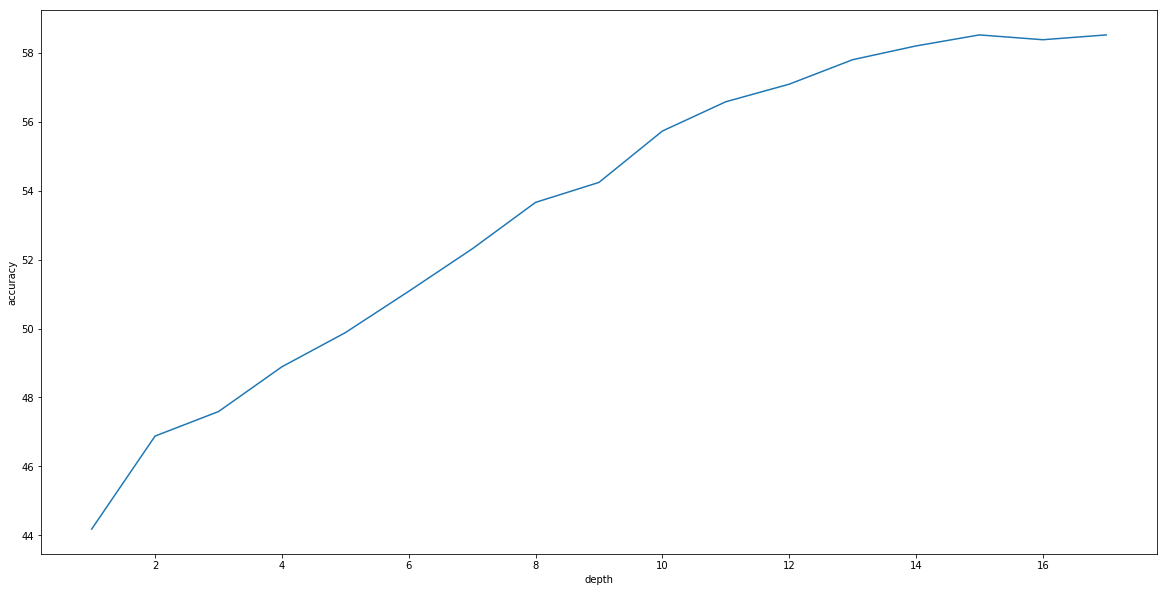

In [49]:
dt_prunned_accuracies

# The accurancy against the depth is plot
plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.plot(np.arange(1,len(dt_prunned_accuracies)+1), dt_prunned_accuracies)
plt.xlabel("depth")
plt.ylabel("accuracy")
plt.show()

Depth of 15 gaives the maximum accuracy of ~58%. After that, there's no significant improvement in accurancy and the tree will start to overfit.

<h3>Random Forest Classifier</h3>

Random Forest uses bagging, feature bagging and Decision Trees. Hence, It will reduce the variance and increase bias compare to decision tree. For depth of each tree, uses max depth to 15.

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [51]:
sfm = SelectFromModel(DecisionTreeClassifier(criterion='entropy', max_depth=15))
feature_selected_rf = sfm.fit_transform(X_pca, y_total_new_cat)

In [52]:
rfc = RandomForestClassifier(n_estimators=10, criterion='entropy', max_depth=15)
dt_accuracies = k_fold_validation_on_model(rfc, feature_selected_rf, y_total_new_cat)

print("Average Accuracy(Decision Tree): ", np.mean(dt_accuracies).round(2))


Average Accuracy(Decision Tree):  62.18


Random Forest performs slightly better than Decision tree, as multiple decision trees are used for decision making, each tree having different samples (bagging) and feature (feature bagging)

<h3>Boosting - Adaboost</h3>

Decision Tree and Random Forest performs relatively well. With the tree level of 15, they can fit the dataset relatively well. What if we use boosting with weaker classifier?

For the classifier to be weak, use tree strumps (decision trees with only one depth). Adaboost will then weigh each dataset, giving relatively higher weight for data that were wrongly classified in the previous iteration, so that it has higher probability to be included in next iteration. Also it will give the weight for each model depending on its error rate.

In [38]:
from sklearn.ensemble import AdaBoostClassifier

In [53]:
#feature selection is not necessary as adaboost weigh each feature according to its importance

stump = DecisionTreeClassifier(criterion="entropy", max_depth=1)
abc = AdaBoostClassifier(stump)
dt_accuracies = k_fold_validation_on_model(abc, X_pca, y_total_new_cat)

print("Average Accuracy(Adaboost): ", np.mean(dt_accuracies).round(2))


Average Accuracy(Adaboost):  48.41


Adaboost is performing worse than decision tree and random forest. The possible reason is becuasae of outliers in the training dataset such that adaboost will try to learn from mistakes in the previous model and will try to fit those outliers.

In [40]:
from sklearn.linear_model import LogisticRegression

In [54]:
# When adaboost is used with logistic regression which is also weak

abc_regression = AdaBoostClassifier(LogisticRegression())
dt_accuracies = k_fold_validation_on_model(abc, X_pca, y_total_new_cat)

print("Average Accuracy(Adaboost): ", np.mean(dt_accuracies).round(2))

Average Accuracy(Adaboost):  48.54


<h3>Why not Logistic Regression</h3>

According to heatmap, target_total is mostly correlated with RH_kitchen and T_out

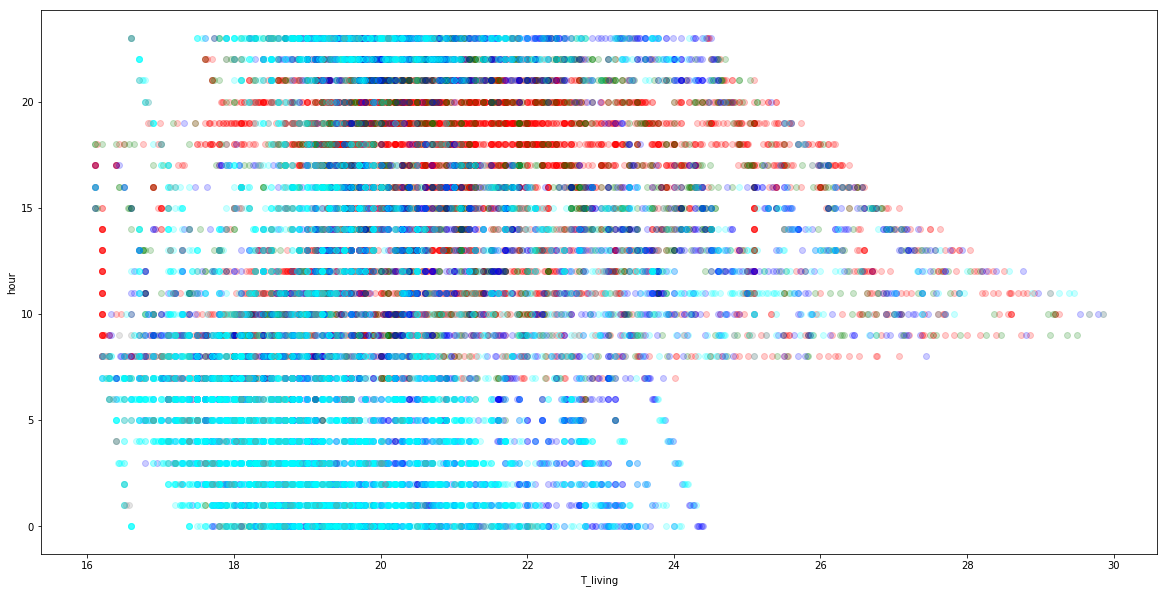

In [42]:
df_plt = df.copy()
df_plt.drop('target_total', axis=1, inplace=True)
df_plt = df_plt.join(y_total_new_cat)
df_cat1 = df_plt[df_plt['target_total']==1]
df_cat2 = df_plt[df_plt['target_total']==2]
df_cat3 = df_plt[df_plt['target_total']==3]
df_cat4 = df_plt[df_plt['target_total']==4]
df_cat5 = df_plt[df_plt['target_total']==5]

plt.rcParams['figure.figsize'] = [20, 10]
plt.figure()
plt.scatter(df_cat1['T_living'], df_cat1['hour'], c='red', alpha=0.2)
plt.scatter(df_cat2['T_living'], df_cat2['hour'], c='green', alpha=0.2)
plt.scatter(df_cat3['T_living'], df_cat3['hour'], c='blue', alpha=0.2)
plt.scatter(df_cat4['T_living'], df_cat4['hour'], c='cyan', alpha=0.2)
plt.scatter(df_cat5['T_living'], df_cat5['hour'], c='gray', alpha=0.2)

plt.xlabel("T_living")
plt.ylabel("hour")
plt.show()

Distribution of different categories of target_total are not linear, logistic regression will be not able to separte the dataset well. Previous observation form running logistic regression gives accuracy of ~49.

<h3>Neural Network</h3>

In [43]:
import keras
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [44]:
y_categorical = np_utils.to_categorical(y_total_new_cat)
train_X, test_X, train_y, test_y = train_test_split(X_pca, y_categorical, train_size=0.7, test_size = 0.3)

train_X.shape

(13814, 15)

In [45]:
# it initializes the model as a sequential model
model = Sequential()
model.add(Dense(12, input_shape=(15,), activation = 'relu'))
model.add(Dense(12, input_shape=(15,), activation = 'relu'))
model.add(Dense(12, input_shape=(15,), activation = 'relu'))
model.add(Dense(6, activation='softmax'))
model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_X, train_y, epochs=200)

Epoch 1/200
13814/13814 [==============================] - 1s 72us/step - loss: 1.5086 - accuracy: 0.3424
Epoch 2/200
13814/13814 [==============================] - 1s 58us/step - loss: 1.3921 - accuracy: 0.3427
Epoch 3/200
13814/13814 [==============================] - 1s 48us/step - loss: 1.3695 - accuracy: 0.3752
Epoch 4/200
13814/13814 [==============================] - 1s 45us/step - loss: 1.3080 - accuracy: 0.4461
Epoch 5/200
13814/13814 [==============================] - 1s 48us/step - loss: 1.2549 - accuracy: 0.4689
Epoch 6/200
13814/13814 [==============================] - 1s 44us/step - loss: 1.2389 - accuracy: 0.4740
Epoch 7/200
13814/13814 [==============================] - 1s 48us/step - loss: 1.2307 - accuracy: 0.4788
Epoch 8/200
13814/13814 [==============================] - 1s 54us/step - loss: 1.2251 - accuracy: 0.4794
Epoch 9/200
13814/13814 [==============================] - 1s 45us/step - loss: 1.2217 - accuracy: 0.4821
Epoch 10/200
13814/13814 [====================

13814/13814 [==============================] - 1s 39us/step - loss: 1.1379 - accuracy: 0.5108
Epoch 78/200
13814/13814 [==============================] - 1s 39us/step - loss: 1.1370 - accuracy: 0.5115
Epoch 79/200
13814/13814 [==============================] - 1s 39us/step - loss: 1.1372 - accuracy: 0.5123
Epoch 80/200
13814/13814 [==============================] - 1s 40us/step - loss: 1.1363 - accuracy: 0.5102
Epoch 81/200
13814/13814 [==============================] - 1s 39us/step - loss: 1.1353 - accuracy: 0.5130
Epoch 82/200
13814/13814 [==============================] - 1s 40us/step - loss: 1.1349 - accuracy: 0.5140
Epoch 83/200
13814/13814 [==============================] - 1s 44us/step - loss: 1.1348 - accuracy: 0.5096
Epoch 84/200
13814/13814 [==============================] - 1s 40us/step - loss: 1.1347 - accuracy: 0.5132
Epoch 85/200
13814/13814 [==============================] - 1s 40us/step - loss: 1.1344 - accuracy: 0.5146
Epoch 86/200
13814/13814 [========================

13814/13814 [==============================] - 1s 42us/step - loss: 1.1000 - accuracy: 0.5303
Epoch 154/200
13814/13814 [==============================] - 1s 43us/step - loss: 1.0982 - accuracy: 0.5283
Epoch 155/200
13814/13814 [==============================] - 1s 53us/step - loss: 1.0982 - accuracy: 0.5286
Epoch 156/200
13814/13814 [==============================] - 1s 50us/step - loss: 1.1007 - accuracy: 0.5305
Epoch 157/200
13814/13814 [==============================] - 1s 44us/step - loss: 1.0977 - accuracy: 0.5300
Epoch 158/200
13814/13814 [==============================] - 1s 43us/step - loss: 1.0976 - accuracy: 0.5321
Epoch 159/200
13814/13814 [==============================] - 1s 44us/step - loss: 1.0973 - accuracy: 0.5307
Epoch 160/200
13814/13814 [==============================] - 1s 44us/step - loss: 1.0973 - accuracy: 0.5303
Epoch 161/200
13814/13814 [==============================] - 1s 45us/step - loss: 1.0971 - accuracy: 0.5320
Epoch 162/200
13814/13814 [===============

In [46]:
scores = model.evaluate(test_X, test_y, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 46.46%
MLP Accuracy on test set: 53.54%


In [47]:
#visualize the accuracy on the training and validation dataset